<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/Combined_Plots_with_EVI_DMI_Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter, YearLocator

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MonthlyUVSData3.csv to MonthlyUVSData3.csv


In [5]:
# Replace 'your_file.csv' with the actual name of your file
df = pd.read_csv('MonthlyUVSData3.csv', delimiter= ';', skipinitialspace=True)

# Display the first few rows to understand the structure
print(df.head())

         date      SAVI     MSAVI      NDVI       EVI        RF        ET  \
0  2019/03/31  0.423300  0.415157  0.614560  0.456100  3.494194  3.793974   
1  2019/04/30  0.423543  0.413157  0.580767  0.475743  2.294667  2.762200   
2  2019/05/31  0.370256  0.353178  0.524160  0.418975  0.300000  2.525832   
3  2019/06/30  0.376910  0.358730  0.499500  0.389600  0.400333  2.230383   
4  2019/07/31  0.354780  0.333070  0.431640  0.368830  0.238065  2.541484   

      SPEI3      SPI3       VCI   Nino3.4       DMI  
0  1.101960  0.300789  0.371444  0.867725  0.377138  
1  0.097428  0.301395  0.468333  0.740107  0.442555  
2  1.119261  0.555210  0.586455  0.685350  0.741548  
3 -5.649626 -5.362104  0.735636  0.595610  0.798363  
4 -1.544766 -2.368804  0.505455  0.477663  0.892166  


In [6]:
!pip install folium
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 74.8 MB/s eta 0:00:00


In [7]:
# Set the 'Date' column as the index
df.set_index('date', inplace=True)
df.head()

,SAVI,MSAVI,NDVI,EVI,RF,ET,SPEI3,SPI3,VCI,Nino3.4,DMI
date,,,,,,,,,,,
2019/03/31,0.423300,0.415157,0.614560,0.456100,3.494194,3.793974,1.101960,0.300789,0.371444,0.867725,0.377138
2019/04/30,0.423543,0.413157,0.580767,0.475743,2.294667,2.762200,0.097428,0.301395,0.468333,0.740107,0.442555
2019/05/31,0.370256,0.353178,0.524160,0.418975,0.300000,2.525832,1.119261,0.555210,0.586455,0.685350,0.741548
2019/06/30,0.376910,0.358730,0.499500,0.389600,0.400333,2.230383,-5.649626,-5.362104,0.735636,0.595610,0.798363
2019/07/31,0.354780,0.333070,0.431640,0.368830,0.238065,2.541484,-1.544766,-2.368804,0.505455,0.477663,0.892166


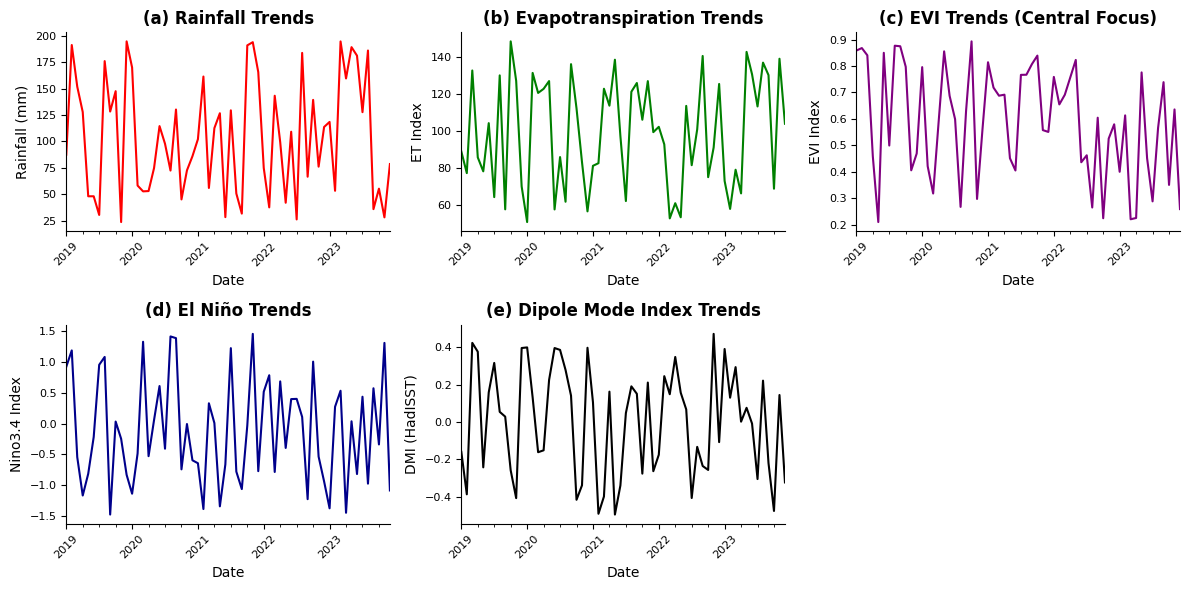

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Simulated dataset for demonstration purposes
np.random.seed(42)
dates = pd.date_range(start="2019-01-01", periods=60, freq='ME')  # 'ME' stands for end of the month

df = pd.DataFrame({
    'Date': dates,
    'RF': np.random.uniform(20, 200, len(dates)),  # Rainfall (in mm)
    'ET': np.random.uniform(50, 150, len(dates)),  # Evapotranspiration
    'Nino3.4': np.random.uniform(-1.5, 1.5, len(dates)),  # El Niño Index
    'DMI': np.random.uniform(-0.5, 0.5, len(dates)),  # Dipole Mode Index (HadISST)
    'EVI': np.random.uniform(0.2, 0.9, len(dates))  # EVI (Central Focus)
})

# Convert 'Date' to datetime format and set as index
df.set_index('Date', inplace=True)

# Use the default Matplotlib style for a clean look
plt.style.use('default')

# Create a directory for saving plots
save_path = "plots"
os.makedirs(save_path, exist_ok=True)  # Create folder if it doesn't exist

# Create a 2x3 grid of plots (6 plots, EVI in the center)
fig, axes = plt.subplots(2, 3, figsize=(12, 6))  # Adjusted figure size to fit 1/2 page

# Define plot details with correct Y-axis labels
plot_details = [
    ('RF', 'red', '(a) Rainfall Trends', 'Rainfall (mm)'),
    ('ET', 'green', '(b) Evapotranspiration Trends', 'ET Index'),
    ('EVI', 'purple', '(c) EVI Trends (Central Focus)', 'EVI Index'),  # Center plot
    ('Nino3.4', 'darkblue', '(d) El Niño Trends', 'Nino3.4 Index'),
    ('DMI', 'black', '(e) Dipole Mode Index Trends', 'DMI (HadISST)')  # DMI with correct Y-axis
]

# Set Times New Roman font
plt.rcParams['font.family'] = 'Times New Roman'

# Loop through and plot each variable
for ax, (column, color, title, ylabel) in zip(axes.flatten(), plot_details):
    df[column].plot(ax=ax, color=color, linewidth=1.5)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)  # Correct Y-axis labels
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_facecolor('white')

# Remove empty subplot (since we now have 5 plots in a 2x3 layout)
fig.delaxes(axes[1, 2])

# Adjust layout for compactness
plt.tight_layout()

# Save the combined figure
save_location = os.path.join(save_path, "Combined_Plots_with_EVI_DMI_Rainfall.png")
plt.savefig(save_location, dpi=300, bbox_inches='tight')

# Show the final combined plot
plt.show()